In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [200]:
df = pd.read_csv('marketing_data.csv')
print(df.shape)
df.head()

(2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


### Data Processing

In [202]:
df = df.rename(columns = {' Income ' : 'Income'})

In [203]:
df['Income'] = df['Income'].astype(str).replace('$','',regex=True)

In [204]:
df['Income'] = df['Income'].str.replace('$', '', regex=True)

In [205]:
df['Income'] = df['Income'].str.replace(',','', regex = True).astype(float)

In [206]:
df['Dt_Customer'] =  pd.to_datetime(df['Dt_Customer'])

In [207]:
# df.head()

In [208]:
group_income = df.groupby(['Education','Marital_Status']).agg({'Income' : 'mean'}).reset_index()

In [209]:
merged_df = pd.merge(df,group_income, on = ['Education','Marital_Status'], how = 'left', suffixes = ('','_grouped'))

In [210]:
merged_df['Income'] = merged_df['Income'].fillna(value = merged_df['Income_grouped'])
merged_df['Income'] = merged_df['Income'].astype(float)

In [211]:
merged_df = merged_df.drop('Income_grouped', axis = 1)

In [212]:
merged_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [213]:
merged_df = merged_df.drop_duplicates(keep = False, inplace = False)

In [214]:
curr_year = pd.Timestamp.today().year

In [215]:
merged_df['Age'] = curr_year - df['Year_Birth']

In [216]:
merged_df['No_children'] = merged_df['Kidhome']+ merged_df['Teenhome']
merged_df['Mn_Total'] = merged_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)
merged_df['Accepted_campaign'] = merged_df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']].sum(axis=1)
# merged_df['Total_Purchases'] = merged_df[['NumDealsPurchases', 'NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [217]:
merged_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'No_children',
       'Mn_Total', 'Accepted_campaign'],
      dtype='object')

In [218]:
pd.set_option('display.max_columns',None)
merged_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,No_children,Mn_Total,Accepted_campaign
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55,0,1190,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64,0,577,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67,1,251,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58,2,11,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36,1,91,1


In [219]:
print(merged_df.Age.min(), merged_df.Age.max())

29 132


In [221]:
def age_grp_assigned(Age):
    if Age <= 35:
        return 'Young'
    elif 36 <= Age <= 55:
        return 'Middle-Aged'
    else:
        return 'Old'

merged_df['Age_grp'] = merged_df['Age'].apply(age_grp_assigned)

In [223]:
merged_df[['Age','Age_grp']].head()

,Age,Age_grp
0,55,Middle-Aged
1,64,Old
2,67,Old
3,58,Old
4,36,Middle-Aged


In [224]:
age_cnt = merged_df['Age_grp'].value_counts()

In [225]:
age_pct = age_cnt/merged_df.shape[0]
age_pct = age_pct.reset_index()
age_pct.columns = ['Age_grp','Percentage']
age_pct.sort_values(by='Age_grp', inplace=True)
age_pct

,Age_grp,Percentage
0,Middle-Aged,0.492411
1,Old,0.480357
2,Young,0.027232


In [226]:
age_pct = age_pct.sort_values("Age_grp")

In [227]:
age_pct

,Age_grp,Percentage
0,Middle-Aged,0.492411
1,Old,0.480357
2,Young,0.027232


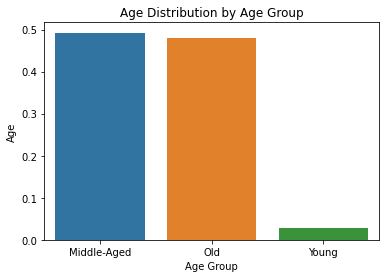

In [228]:
sns.barplot(x='Age_grp', y='Percentage', data = age_pct);
plt.title('Age Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.show()

In [182]:
merged_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'No_children',
       'Mn_Total', 'Accepted_campaign', 'Age_grp'],
      dtype='object')

In [231]:
df = merged_df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income','Dt_Customer', 'Recency','Mn_Total', 'Accepted_campaign', 'Age_grp', \
               'NumWebVisitsMonth','Response', 'Complain', 'Country', 'Age', 'No_children','NumDealsPurchases', 'NumWebPurchases',\
       'NumCatalogPurchases', 'NumStorePurchases']]

In [232]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Mn_Total', 'Accepted_campaign', 'Age_grp',
       'NumWebVisitsMonth', 'Response', 'Complain', 'Country', 'Age',
       'No_children', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'],
      dtype='object')

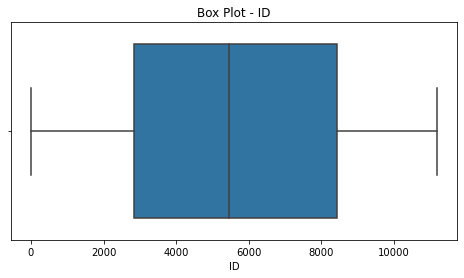

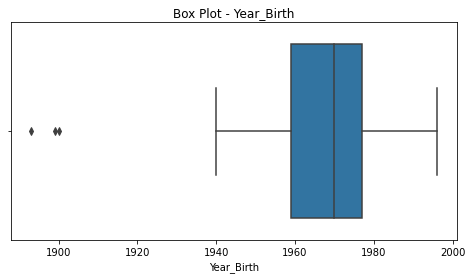

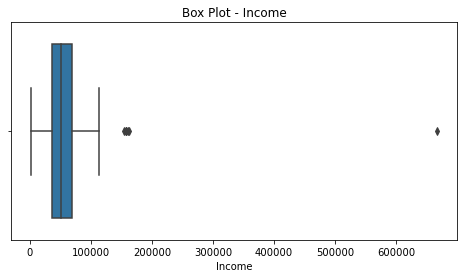

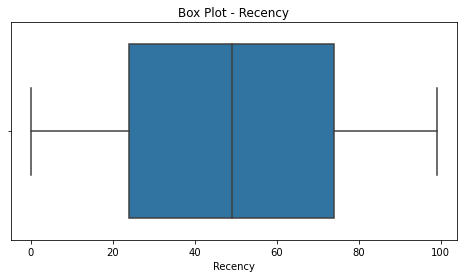

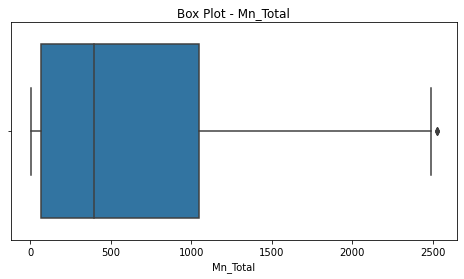

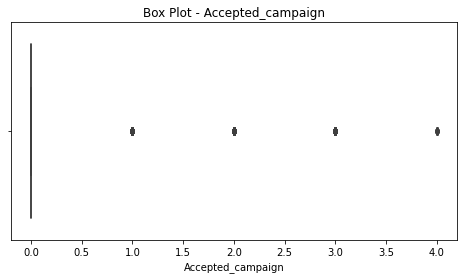

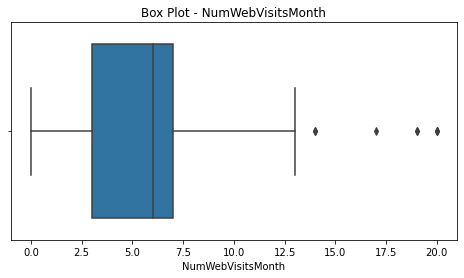

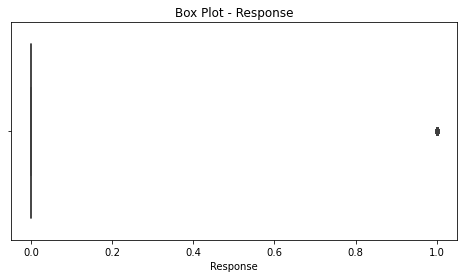

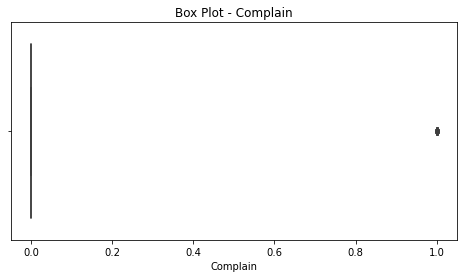

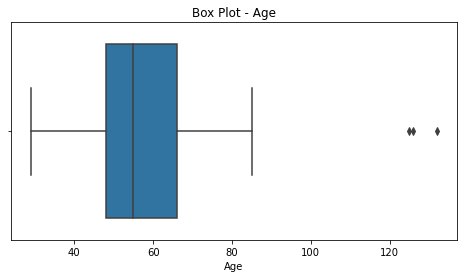

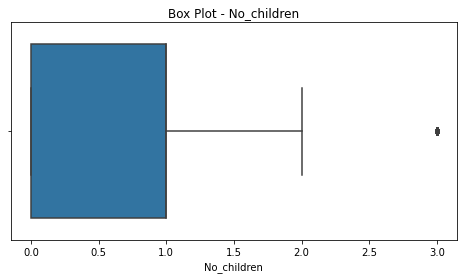

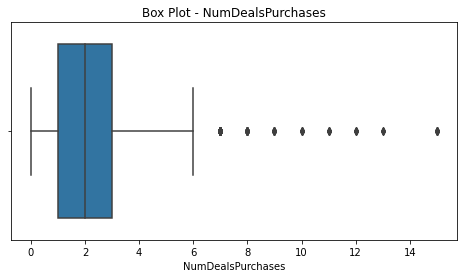

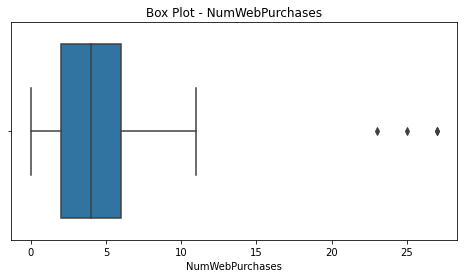

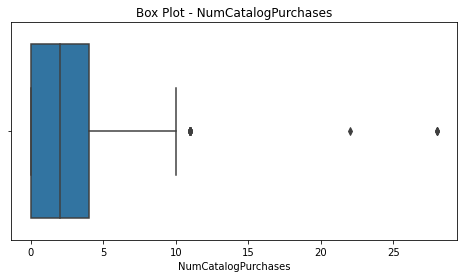

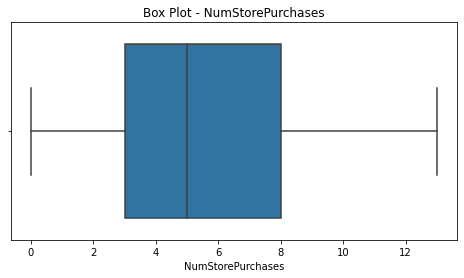

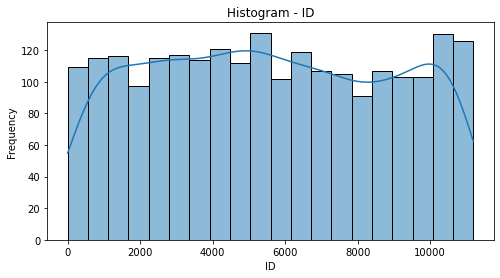

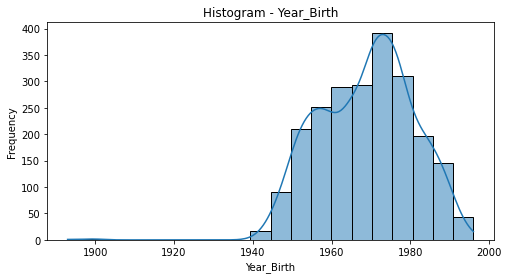

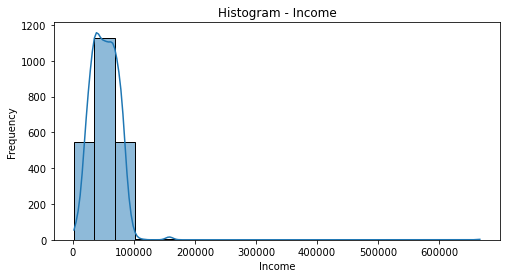

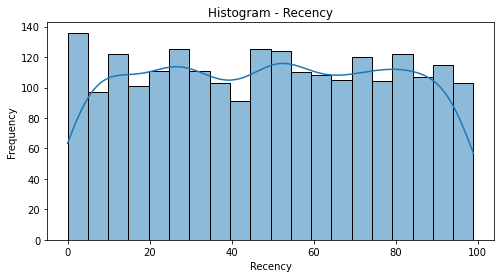

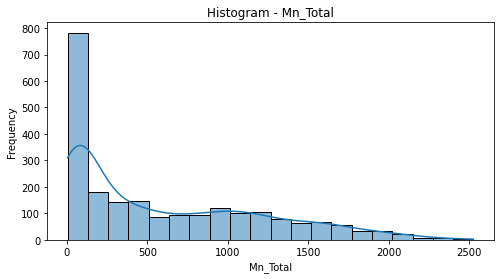

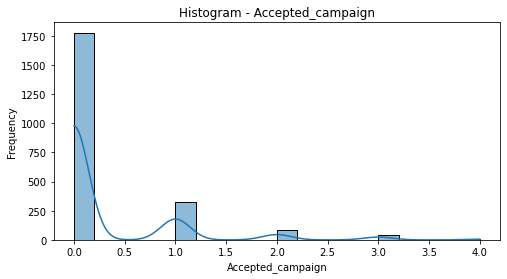

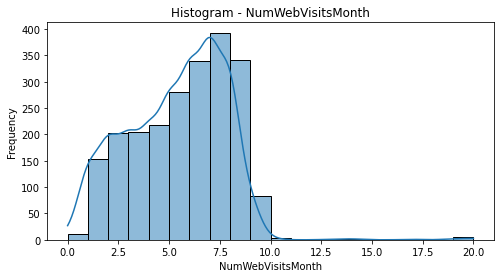

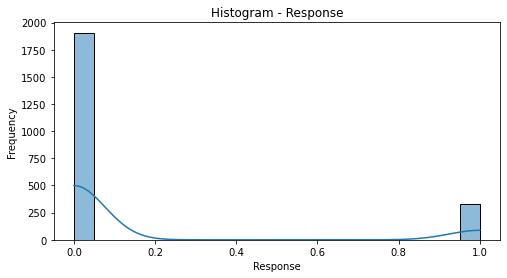

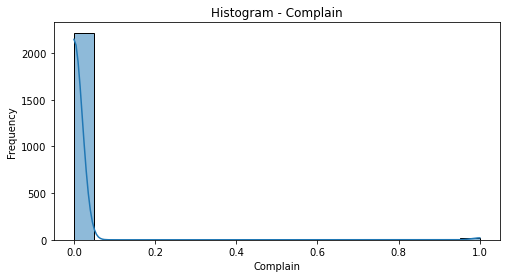

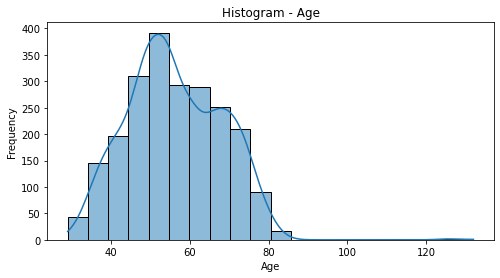

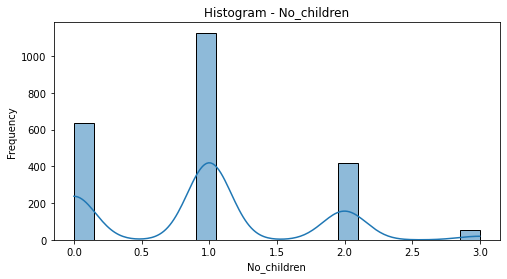

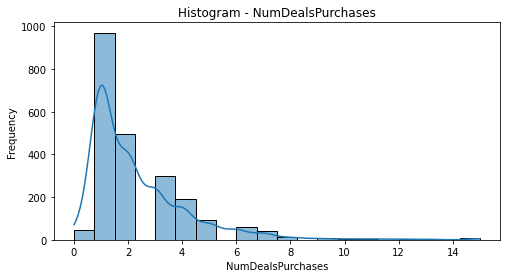

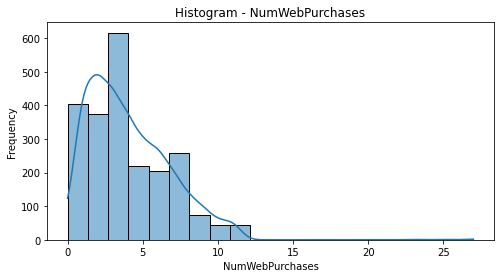

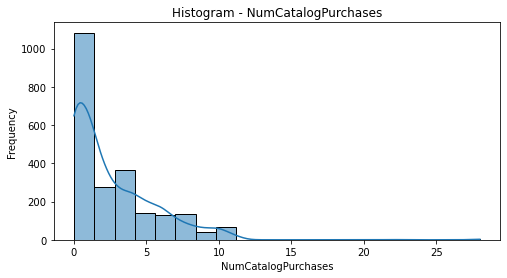

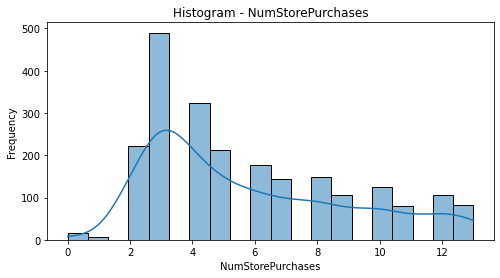

In [233]:
# Generate Box Plots for numeric columns
for column in df.select_dtypes(include=["float64", "int64"]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot - {column}")
    plt.show()

# Generate Histograms for numeric columns
for column in df.select_dtypes(include=["float64", "int64"]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f"Histogram - {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Outlier Treatment: Using IQR (Interquartile Range)
def treat_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds (capping method)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])




In [234]:
# Apply outlier treatment to all numeric columns
for column in ['Age','No_children','Mn_Total','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']:
    treat_outliers_iqr(column)



C:\Users\S.Sreejyothi\AppData\Local\Temp\ipykernel_13796\886663645.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
C:\Users\S.Sreejyothi\AppData\Local\Temp\ipykernel_13796\886663645.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


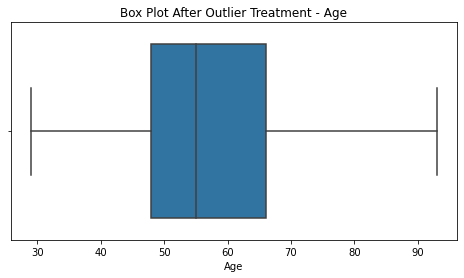

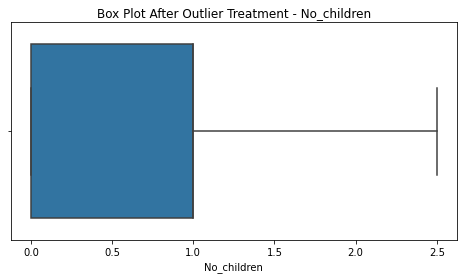

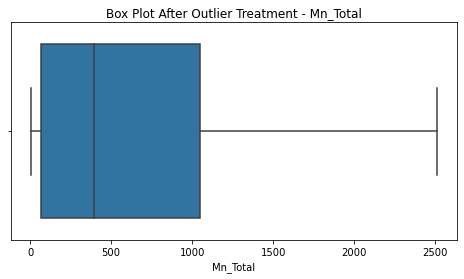

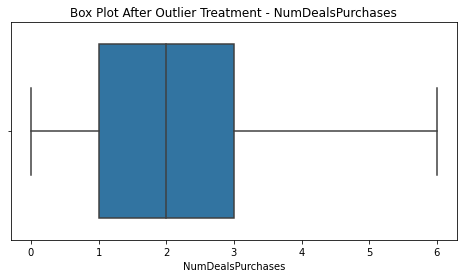

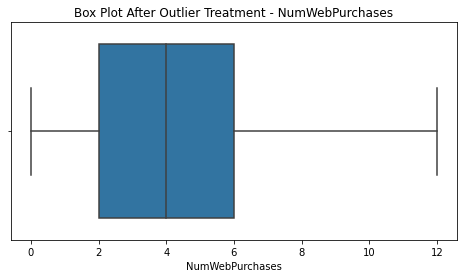

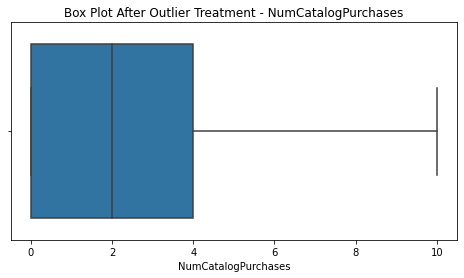

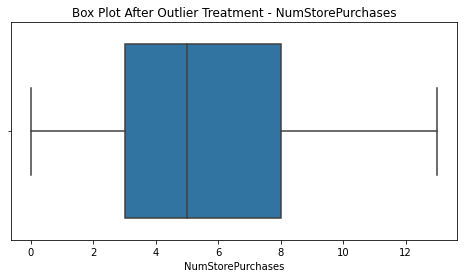

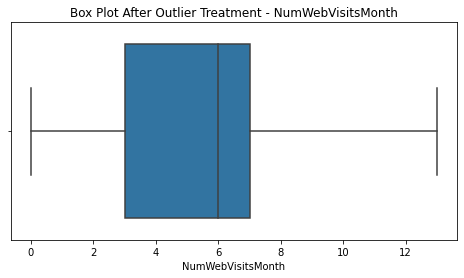

In [235]:
# Verify changes with new Box Plots
for column in ['Age','No_children','Mn_Total','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot After Outlier Treatment - {column}")
    plt.show()

### One hot encoding : Marital status & Country

In [238]:
df = pd.get_dummies(df,columns = ['Marital_Status','Country'])

### Ordinal Encoding : Education

In [239]:
Education_order = ['Basic','2n Cycle','Graduation','Master','PhD']
encoder = OrdinalEncoder(categories=[Education_order])
df['education_encoded'] = encoder.fit_transform(df[['Education']])

### Correlation Matrix & Heat Map

<AxesSubplot:>

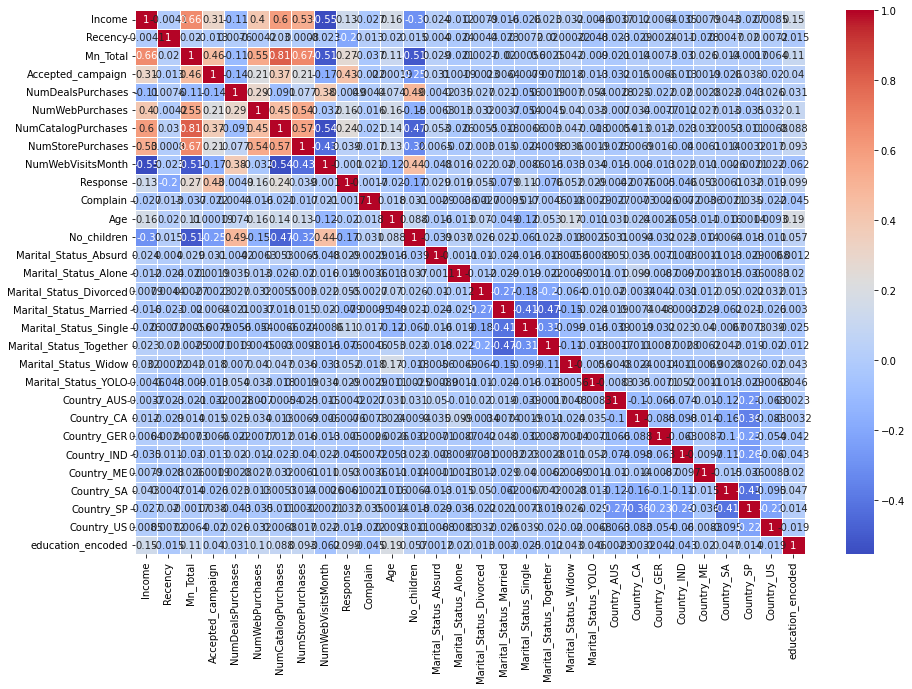

In [240]:
correlation_matrix = df[['Income', 'Dt_Customer', 'Recency',
       'Mn_Total', 'Accepted_campaign', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'No_children',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US', 'education_encoded']].corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

## Hypothesis Testing

a. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

Null Hypothesis (H0): The number of in-store purchases (NumStorePurchases) is not significantly different between age groups.

Alternative Hypothesis (H1): Older individuals make significantly more in-store purchases than younger individuals.

In [245]:
from scipy.stats import f_oneway

young_store_purchase = df[df['Age_grp'] == 'Young']['NumStorePurchases']
MiddleAged_store_purchase = df[df['Age_grp'] == 'Middle-Aged']['NumStorePurchases']
Old_store_purchase = df[df['Age_grp'] == 'Old']['NumStorePurchases']

F_stat, p_value = f_oneway(young_store_purchase,MiddleAged_store_purchase,Old_store_purchase)

print(f"p_value :{p_value}")

if p_value < 0.05:
    print("There is a significant difference in the number of in-store purchases across age groups.")
else:
    print("There is no significant difference in the number of in-store purchases across age groups.")

p_value :1.4934434882669673e-09
There is a significant difference in the number of in-store purchases across age groups.


b. Customers with children likely experience time constraints, making online shopping a more convenient option.


In [251]:
from scipy.stats import ttest_ind

cust_with_kids = df[df['No_children'] > 0]['NumWebPurchases']
cust_without_kids = df[df['No_children'] == 0]['NumWebPurchases']

t_stat, p_value = ttest_ind(cust_with_kids, cust_without_kids)

print(f"p_value :{p_value}")
if p_value < 0.05:
    print("There is a significant difference in online purchases between customers with and without children.")
else:
    print("There is no significant difference in online purchases between customers with and without children.")

p_value :0.0004795044503969162
There is a significant difference in online purchases between customers with and without children.


c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [252]:
correlation = df['NumStorePurchases'].corr(df['NumWebPurchases'])

print(f"Pearson correlation between store and online purchases: {correlation}")

if correlation < 0:
    print("There is a negative correlation, suggesting that online purchases may cannibalize store sales.")
else:
    print("There is no significant negative correlation between store and online purchases.")

Pearson correlation between store and online purchases: 0.5433171405788443
There is no significant negative correlation between store and online purchases.


d. Does the United States significantly outperform the rest of the world in total purchase volumes?

In [255]:
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

us_data = df[df['Country_US'] == 1]['Total_Purchases']
rest_of_world_data = df[df['Country_US'] != 1]['Total_Purchases']

t_stat, p_value = ttest_ind(us_data, rest_of_world_data)

print(f"p-value: {p_value}")

if p_value < 0.05:
    print("The United States significantly outperforms the rest of the world in total purchase volumes.")
else:
    print("There is no significant difference between the United States and the rest of the world in total purchase volumes.")

p-value: 0.2037409859034041
There is no significant difference between the United States and the rest of the world in total purchase volumes.


### Data Visualization

In [256]:
merged_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,No_children,Mn_Total,Accepted_campaign,Age_grp
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55,0,1190,0,Middle-Aged
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64,0,577,1,Old
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67,1,251,0,Old
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58,2,11,0,Old
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36,1,91,1,Middle-Aged


In [278]:
data.items()

dict_items([('Wine', 680816), ('Fruit', 58917), ('Meat', 373968), ('Fish', 84057), ('Sweet', 60621), ('Gold', 98609)])

In [290]:
data = {
    'Wine' : merged_df['MntWines'].sum(), 'Fruit':merged_df['MntFruits'].sum(), 'Meat' : merged_df['MntMeatProducts'].sum(),
    'Fish': merged_df['MntFishProducts'].sum(), 'Sweet': merged_df['MntSweetProducts'].sum(), 'Gold': merged_df['MntGoldProds'].sum()
}

data_list = [(key, value) for key, value in data.items()]

df1 = pd.DataFrame(data_list, columns = ['Product','Revenue'])

<AxesSubplot:xlabel='Product', ylabel='Revenue'>

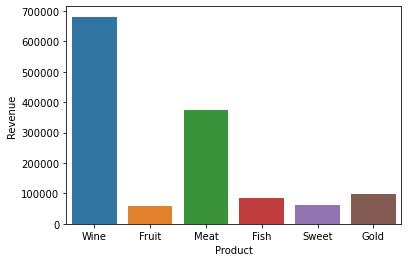

In [291]:
sns.barplot(x='Product',y='Revenue', data=df1)

In [299]:
contingency_table = pd.crosstab(df['Age_grp'], df['Response'], normalize='index')

In [300]:
contingency_table

Response,0,1
Age_grp,,
Middle-Aged,0.844062,0.155938
Old,0.862454,0.137546
Young,0.770492,0.229508


<AxesSubplot:xlabel='Response', ylabel='Age_grp'>

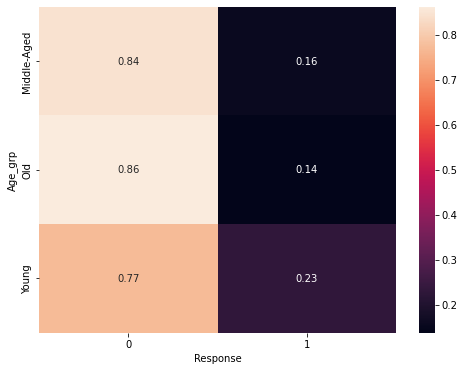

In [302]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="0.2f")

Among youth, acceptance rate of campaign is the highest (23%), followed by middle aged and Old.

In [303]:
merged_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'No_children',
       'Mn_Total', 'Accepted_campaign', 'Age_grp'],
      dtype='object')

In [321]:
country_grp = pd.DataFrame(merged_df.groupby('Country').agg({'Response': 'sum'})).reset_index()

In [324]:
country_grp

,Country,Response
0,AUS,23
1,CA,38
2,GER,17
3,IND,13
4,ME,2
5,SA,52
6,SP,176
7,US,13


<AxesSubplot:xlabel='Country', ylabel='Response'>

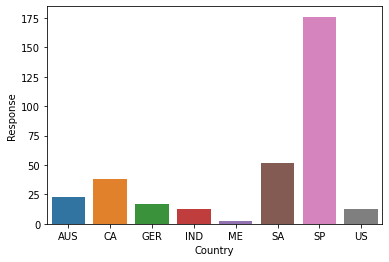

In [327]:
sns.barplot(data=country_grp, x='Country', y='Response')

SP has the highest number of customers who accepted campaign

<AxesSubplot:xlabel='No_children', ylabel='Mn_Total'>

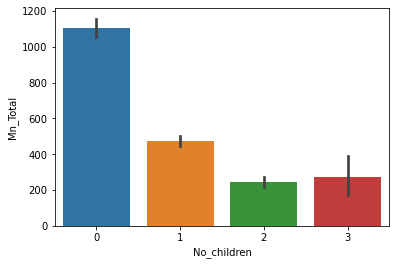

In [331]:
sns.barplot(data=merged_df, x='No_children', y='Mn_Total')

Households without children likely spend more.

In [363]:
df2 = (merged_df[merged_df.Complain == 1]['Education'].value_counts(normalize=True)*100) \
                                                      .reset_index() \
                                                      .rename(columns={'index': 'Education', 'Education': 'Percentage'})
                                            

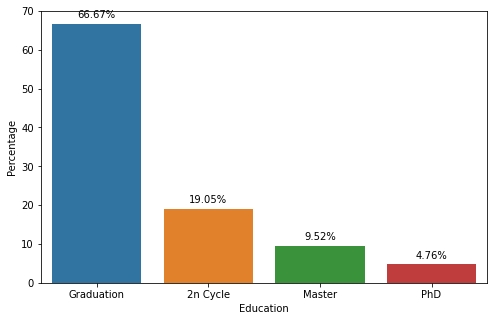

In [366]:
plt.figure(figsize=(8,5))
sns.barplot(data=df2, x='Education',y='Percentage')

for index, row in df2.iterrows():
    plt.text(index, row['Percentage'] + 1, f"{row['Percentage']:.2f}%", 
             color='black', ha="center", va="bottom")

plt.show()

66% of the complaints were raised by Graduates.